## Варіант 5
### Завдання 1. Запишіть систему рівнянь для свого варіанту завдання.
Застосуйте метод Рунге-Кутта 4-го порядку, щоб отримати розв'язок.

Побудуйте графіки результатів, щоб візуалізувати, як залежні змінні змінюються з часом.

Побудуйте графіки залежності змінних одна від іншої, щоб побачити наявність якихось закономірностей.

$$a=1.39;\quad b=1.48;\quad c=0.99;\quad d=0.49;\quad x_0=2.69;\quad y_0=1.68$$

Процес розглядається на інтервалі часу від моменту часу $t = 5$ до моменту
часу $t = 35$

Точність $\varepsilon = 0.001$ 

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, Markdown, Math
from matplotlib.pyplot import figure
from numpy.polynomial import polynomial
from scipy.misc import derivative

In [196]:
class PredatorPrey():
    """
    System of ordinary differential equations in models Predator Prey
    Using Lotka–Volterra equations
    """
    def __init__(self, a, b, c, d, x_0, y_0, l_bound, u_bound, error = 0.001):
        """
        a, b, c, d       : Lotka–Volterra equations coefficients
        x_0, y_0         : Starting points
        l_bound, u_bound : Period of simulation bounds
        error            : How accurate modell have to be
        """
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.x_0 = x_0
        self.y_0 = y_0
        self.l_bound = l_bound
        self.u_bound = u_bound
        self.time_number = np.abs(self.u_bound - self.l_bound)
        # Same as epsilon in LV equations
        self.error = error
        # Make ready-to-apply functions
        self.f_1 = self.prey_func
        self.f_2 = self.predator_func
    
    @staticmethod
    def runge_error(step, halfstep, accuracy_order = 4):
        """
        Error value by Runge
        step: value on current iteration
        halfstep: value on next iteration with half of previous step
        accuracy_order: accuracy order for current aproximation, 4 for LV"""
        return np.abs(np.subtract(step, halfstep))/(2**accuracy_order-1)
    
    @property
    def prey_func(self):
        """Construct prey function
        x: Prey number
        y: Predator number
        a: Prey increase
        b: Prey decrease caused by predator"""
        return lambda x, y: self.a*x - self.b*x*y
    
    @property
    def predator_func(self):
        """Construct predator function
        x: Prey number
        y: Predator number
        c: Predator decrease
        d: Predator increase caused by prey"""
        return lambda x, y: -self.c*y + self.d*x*y
    
    def runge_kutta_4(self, x_prev, y_prev, h):
        k_1 = h*self.f_1(x_prev, y_prev)
        q_1 = h*self.f_2(x_prev, y_prev)
        
        k_2 = h*self.f_1(x_prev + k_1/2, y_prev + q_1/2)
        q_2 = h*self.f_2(x_prev + k_1/2, y_prev + q_1/2)
        
        k_3 = h*self.f_1(x_prev + k_2/2, y_prev + q_2/2)
        q_3 = h*self.f_2(x_prev + k_2/2, y_prev + q_2/2)
        
        k_4 = h*self.f_1(x_prev + k_3/2, y_prev + q_3/2)
        q_4 = h*self.f_2(x_prev + k_3/2, y_prev + q_3/2)
        
        x = x_prev + (k_1 + 2*k_2 + 2*k_3 + k_4)/6
        y = y_prev + (q_1 + 2*q_2 + 2*q_3 + q_4)/6
        
        return x, y
    
    def runge_kutta_loop(self, n):
        X = [self.x_0]
        Y = [self.y_0]
        for i in range(n-1):
            x_i, y_i = self.runge_kutta_4(X[-1], Y[-1], self.time_number/n)
            X.append(x_i)
            Y.append(y_i)
        return X, Y
    
    def solve(self):
        # guess first step from error
        self.n = int(np.ceil(self.time_number/self.error**(1/4)))
        # add 1 if odd
        self.n += self.n%2
        # set zero state
        X, Y = self.runge_kutta_loop(self.n)
        self.R = np.inf
        while self.R > self.error:
            X_by_2, Y_by_2 = self.runge_kutta_loop(self.n*2)
            self.R = max(
                np.max(self.runge_error(X, X_by_2[::2])),
                np.max(self.runge_error(Y, Y_by_2[::2])),
            )
            X, Y = X_by_2, Y_by_2
            self.n *= 2

        self.X, self.Y = self.runge_kutta_loop(self.n)
        self.T = np.linspace(self.l_bound, self.u_bound, self.n)
        self.h = self.time_number/self.n
    
    def display(self):
        plt.figure(0, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
        plt.plot(self.T, self.X, 'b')
        plt.plot(self.T, self.Y, 'r')
        blue_patch = mpatches.Patch(color='blue', label='Популяція здобичі')
        red_patch = mpatches.Patch(color='red', label='Популяція хижака')
        plt.legend(handles=[blue_patch, red_patch])
        plt.title("Популяція здобичі і хижака залежно від часу")
        plt.show()
        
        plt.figure(1, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
        plt.plot(self.X, self.Y, 'purple')
        plt.plot(self.c/self.d, self.a/self.b, 'ko')
        plt.title("Популяція здобичі залежно від хижака")
        plt.show()

Задаємо початкові коефіцієнти

In [197]:
a = 1.39
b = 1.48
c = 0.99
d = 0.49
x_0 = 2.69
y_0 = 1.68
l_bound = 5
u_bound = 35
epsilon = 0.001

process = PredatorPrey(a, b, c, d, x_0, y_0, l_bound, u_bound, epsilon)

Розв'язуємо рівняння. Процес розв'язання відбувається в методі solve

In [198]:
process.solve()
display(Markdown(f"""Кількість кроків $n = {process.n}$

Довжина кроку $h = {process.h}$

Похибка за правилом Рунге $R = {process.R}$
"""))

Кількість кроків $n = 43520$

Довжина кроку $h = 0.0006893382352941177$

Похибка за правилом Рунге $R = 0.0007385783230083061$


Будуємо графіки

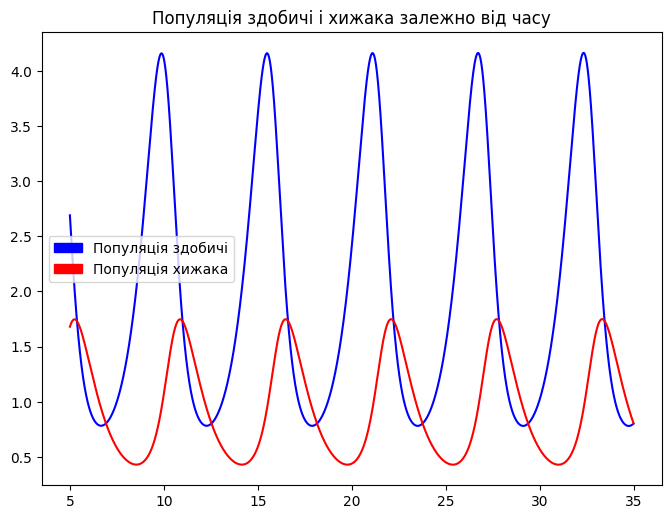

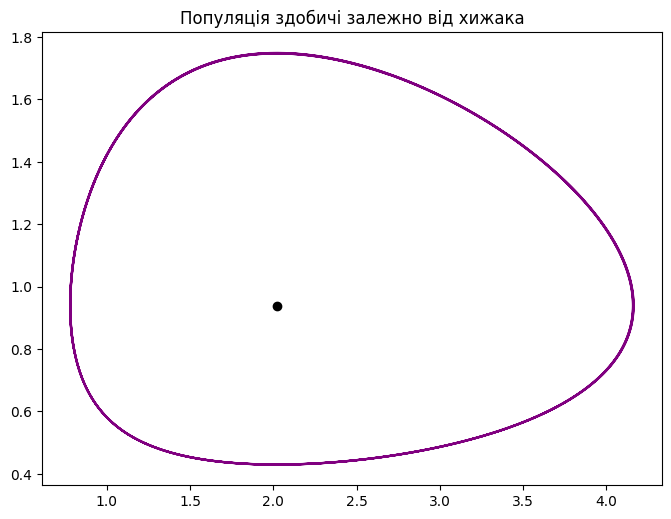

In [199]:
process.display()